In [1]:
!pip install utils datasets numpy scipy seaborn matplotlib gdown

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.1/519.1 kB 7.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.3/36.3 MB 29.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 50.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 58.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.9/38.9 MB 34.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 36.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 65.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 59.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 55

In [ ]:
from helper_functions.get_collected_data import *
import scipy.io

x = GetEMGData("Collected_Data/Subject_1/WA_thumb.mat")
for i in x:
    print(i.shape)

# for i in dy[7][0][0][3][0]:
#   print(i.item())

# for i in dy[6][0][0][5][0]:
#   print(i.item()) 

# day 7: Slot C (AbdulRahman) Slot D (Ahmed) Slot E (Moaz) Slot G (Somaya)

In [2]:
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader, TensorDataset

from utils import *

import datasets
from datasets import load_dataset, load_metric

import scipy
import numpy as np
import pandas as pd

import pickle
import gdown
import os

import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [3]:
def get_n_params(model):
    total = 0
    for param in model.parameters():
        total += param.nelement()+
    print(f"The total number of parameters is {total}")

In [5]:
import os
import scipy.io

# Specify the directory where your .mat files are located
directory = '/'

# Get a list of all files and folders in that directory
files = os.listdir(directory)

# Initialize empty lists to store the dataframes
emg_list = []
acc_list = []
glove_list = []
stimulus_list = []
restimulus_list = []
repetition_list = []
rerepetition_list = []

# Loop through the files and load only the ones with .mat extension
matfiles = []
for file in files:
    # Check if the file name ends with .mat
    if file.endswith(".mat"):
        # Construct the full path to the file
        filepath = os.path.join(directory, file)
        # Load the file contents into a dictionary
        df = scipy.io.loadmat(filepath)

        emg = pd.DataFrame(df["emg"])
        acc = pd.DataFrame(df["acc"])
        glove = pd.DataFrame(df["glove"])
        stimulus = pd.DataFrame(df["stimulus"])
        restimulus = pd.DataFrame(df["restimulus"])
        repetition = pd.DataFrame(df["repetition"])
        rerepetition = pd.DataFrame(df["rerepetition"])

        # Append the dataframes to the lists
        emg_list.append(emg)
        acc_list.append(acc)
        glove_list.append(glove)
        stimulus_list.append(stimulus)
        restimulus_list.append(restimulus)
        repetition_list.append(repetition)
        rerepetition_list.append(rerepetition)

In [6]:
# Concatenate the dataframes along the rows axis
emg_concat = pd.concat(emg_list, axis=0)
acc_concat = pd.concat(acc_list, axis=0)
glove_concat = pd.concat(glove_list, axis=0)
stimulus_concat = pd.concat(stimulus_list, axis=0)
restimulus_concat = pd.concat(restimulus_list, axis=0)
repetition_concat = pd.concat(repetition_list, axis=0)
rerepetition_concat = pd.concat(rerepetition_list, axis=0)

# Print the shape of the concatenated dataframe
print(emg_concat.shape)
print(acc_concat.shape)
print(glove_concat.shape)
print(stimulus_concat.shape)
print(restimulus_concat.shape)
print(repetition_concat.shape)
print(rerepetition_concat.shape)

(34785464, 12)
(34785464, 36)
(34785464, 22)
(34785464, 1)
(34785464, 1)
(34785464, 1)
(34785464, 1)


In [4]:
# this requires a high system ram (> 20G)
# Import the libraries
import gdown
import scipy.io
import pandas as pd

# Define a function that takes a list of file URLs and returns a concatenated dataframe
def load_and_concatenate_data(file_urls):
    # Initialize empty lists to store the dataframes
    emg_list = []
    acc_list = []
    glove_list = []
    stimulus_list = []
    restimulus_list = []
    repetition_list = []
    rerepetition_list = []

    # Loop through the file URLs
    for file_url in file_urls:
        # Extract file ID from URL
        file_id = file_url.split("/d/")[1].split("/view")[0]

        # Construct download link
        download_url = f"https://drive.google.com/uc?id={file_id}"

        # Download file to a temporary path
        temp_path = f"{file_id}.mat"
        gdown.download(download_url, temp_path, quiet=False)

        # Load the data from the file
        df = scipy.io.loadmat(temp_path)
        emg = pd.DataFrame(df["emg"])
        acc = pd.DataFrame(df["acc"])
        glove = pd.DataFrame(df["glove"])
        stimulus = pd.DataFrame(df["stimulus"])
        restimulus = pd.DataFrame(df["restimulus"])
        repetition = pd.DataFrame(df["repetition"])
        rerepetition = pd.DataFrame(df["rerepetition"])

        # Append the dataframes to the lists
        emg_list.append(emg)
        acc_list.append(acc)
        glove_list.append(glove)
        stimulus_list.append(stimulus)
        restimulus_list.append(restimulus)
        repetition_list.append(repetition)
        rerepetition_list.append(rerepetition)

    # Concatenate the dataframes along the rows axis
    emg_concat = pd.concat(emg_list, axis=0)
    acc_concat = pd.concat(acc_list, axis=0)
    glove_concat = pd.concat(glove_list, axis=0)
    stimulus_concat = pd.concat(stimulus_list, axis=0)
    restimulus_concat = pd.concat(restimulus_list, axis=0)
    repetition_concat = pd.concat(repetition_list, axis=0)
    rerepetition_concat = pd.concat(rerepetition_list, axis=0)

    # Return the concatenated dataframe
    return emg_concat, acc_concat, glove_concat, stimulus_concat, restimulus_concat, repetition_concat, rerepetition_concat

# Define a list of file URLs from your drive
file_urls = [ 
        "https://drive.google.com/file/d/12JKeasji8ioXR4BED7ES9TWpB0d4zD97/view?usp=sharing", "https://drive.google.com/file/d/13NOAhiQeP7r2HW51JsAqon0MOVvJD_bW/view?usp=sharing",
        "https://drive.google.com/file/d/15iXjoSYr4c0Ojtgh3L3YFDEcF1dIikNW/view?usp=sharing", "https://drive.google.com/file/d/191u0If5FzOOy2eg328VrTtzd8IINDpn4/view?usp=sharing",
        "https://drive.google.com/file/d/1DuECgFsdWVQhvMb3BvYBGRAOqJzQYIP9/view?usp=sharing", "https://drive.google.com/file/d/1RIGyVwYkKXNMLA4r_o7PZzY03erKr9KV/view?usp=sharing", 
        "https://drive.google.com/file/d/1aW7bYXEzp_0hytdizV_oo5n7C8woPlz6/view?usp=sharing", "https://drive.google.com/file/d/1agfb9EqMNe9dW_c_UkGP-pQ_JEX-TK1_/view?usp=sharing", 
        "https://drive.google.com/file/d/1bhrvIGgsKgndZZeNOoXaOIZU8WqyN3in/view?usp=sharing", "https://drive.google.com/file/d/1gPNS7MOMbj1Qbh5hS3tn20wZK4YQ-EMo/view?usp=sharing", 
        "https://drive.google.com/file/d/1gV2xDZoKi6Fqg-KtslEihNFr7_KB2fyz/view?usp=sharing", "https://drive.google.com/file/d/1gveIEjhYuPZCWspBWhmDqbufqLUSl4c0/view?usp=sharing", 
        "https://drive.google.com/file/d/1iY3PexxO49p4Sa6VgDq8YhLjo1_o9ZgI/view?usp=sharing", "https://drive.google.com/file/d/1nsqWX6kJQunncwxZJP1S4-U6h2iBKmSD/view?usp=sharing", 
        "https://drive.google.com/file/d/1sQ1uqJ1ttRQC7ikkIW20xCMB4gEs0CrW/view?usp=sharing","https://drive.google.com/file/d/1wPCJTvz_JVnx0k0Is8PHj0uUCvGFXT0A/view?usp=sharing"
        ]

# Call the function and get the concatenated dataframe
emg_concat, acc_concat, glove_concat, stimulus_concat, restimulus_concat, repetition_concat, rerepetition_concat = load_and_concatenate_data(file_urls)

# Print the shape of the concatenated dataframe
print(emg_concat.shape)
print(acc_concat.shape)
print(glove_concat.shape)
print(stimulus_concat.shape)
print(restimulus_concat.shape)
print(repetition_concat.shape)
print(rerepetition_concat.shape)

Downloading...
From (uriginal): https://drive.google.com/uc?id=12JKeasji8ioXR4BED7ES9TWpB0d4zD97
From (redirected): https://drive.google.com/uc?id=12JKeasji8ioXR4BED7ES9TWpB0d4zD97&confirm=t&uuid=55ac02a0-c83d-460a-a51a-079ccf2f2a05
To: /12JKeasji8ioXR4BED7ES9TWpB0d4zD97.mat
100%|██████████| 163M/163M [00:04<00:00, 33.2MB/s] 
Downloading...
From (uriginal): https://drive.google.com/uc?id=13NOAhiQeP7r2HW51JsAqon0MOVvJD_bW
From (redirected): https://drive.google.com/uc?id=13NOAhiQeP7r2HW51JsAqon0MOVvJD_bW&confirm=t&uuid=e5b499c9-d95a-4992-9701-f81d895fe6b5
To: /13NOAhiQeP7r2HW51JsAqon0MOVvJD_bW.mat
100%|██████████| 254M/254M [00:07<00:00, 33.2MB/s] 
Downloading...
From (uriginal): https://drive.google.com/uc?id=15iXjoSYr4c0Ojtgh3L3YFDEcF1dIikNW
From (redirected): https://drive.google.com/uc?id=15iXjoSYr4c0Ojtgh3L3YFDEcF1dIikNW&confirm=t&uuid=a3352d1b-6323-419e-9205-2b74e779939e
To: /15iXjoSYr4c0Ojtgh3L3YFDEcF1dIikNW.mat
100%|██████████| 244M/244M [00:12<00:00, 19.3MB/s] 
Downloading...
F

(34785464, 12)
(34785464, 36)
(34785464, 22)
(34785464, 1)
(34785464, 1)
(34785464, 1)
(34785464, 1)


In [5]:
# We will use a Linear model to find the angles of our joints

## Maximum angles for each corresponding joint
Max_angles = np.array([
    [15, 50, 80, 0, 0, 120, 90, 0, 120, 90, 90, 0, 120, 90, 90, 0, 120, 90, 90, 0, 0, 0]
]).reshape(-1, 1)

def GetAngles(gloves_data, max_angles):
    # calculate the min and max of the data
    min_val = gloves_data.min()
    max_val = gloves_data.max()

    # normalize it
    Normalized_data = ((gloves_data - min_val) / (max_val - min_val))

    # find the angles
    fing_angles = np.array(Normalized_data) * max_angles.T

    # convert to DataFrame
    fing_gloves = pd.DataFrame(fing_angles, columns = [f"angles_glove_{i+1}" for i in range(22)])

    return (fing_gloves)

## training

### DNN Approach

In [6]:
# Define the device to work on
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
# device0 = torch.device('cuda:0')
# device1 = torch.device('cuda:1')
# device2 = torch.device('cuda:2')
# device3 = torch.device('cuda:3')
# !export CUDA_VISIBLE_DEVICES=0,1,2,3

print(device)
print(torch.cuda.device_count())

cuda
1


In [9]:
class my_model(nn.Module):
    def __init__(self):
        super().__init__()
        self.relu = nn.ReLU()
        self.drop20 = nn.Dropout(0.2)
        self.drop50 = nn.Dropout(0.5)
        self.layer1 = nn.Linear(in_features = 12, out_features = 128)
        self.layer2 = nn.Linear(in_features = 128, out_features = 256)
        self.layer3 = nn.Linear(in_features = 256, out_features = 1024)
        self.layer4 = nn.Linear(in_features = 1024, out_features = 4096)
        self.layer5 = nn.Linear(in_features = 4096, out_features = 4096)
        self.layer6 = nn.Linear(in_features = 4096, out_features = 2048)
        self.layer7 = nn.Linear(in_features = 2048, out_features = 512)
        self.layer8 = nn.Linear(in_features = 512, out_features = 14)

    def forward(self, inp):
        x = self.relu(self.layer1(inp))
        x = self.relu(self.layer2(x))
        x = self.drop20(x)
        x = self.relu(self.layer3(x))
        x = self.relu(self.layer4(x))
        x = self.drop20(x)
        x = self.relu(self.layer5(x))
        x = self.drop50(x)
        x = self.relu(self.layer6(x))
        x = self.drop20(x)
        x = self.relu(self.layer7(x))
        x = self.layer8(x)
        return (x)

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# Build and define your model
model = my_model()

get_n_params(model)

The total number of parameters is 30724494


In [10]:
# let's try more data

E_concat = GetAngles(glove_concat, Max_angles)

print("Get Angles: Done")
y_train_concat = E_concat.drop(["angles_glove_4", "angles_glove_5", "angles_glove_8", "angles_glove_12", "angles_glove_16", "angles_glove_20", "angles_glove_21", "angles_glove_22"], axis = 1)
print(y_train_concat.shape)

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# Build and define your model
model = my_model()
model.to(device)

# Define the Loss function and the Optimizer
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(params = model.parameters())

# Specify the number of epochs
epochs = 10

# Convert the Dataframe to Tensor
train = torch.tensor(emg_concat.values.astype(np.float32))
train_target = torch.tensor(y_train_concat.values.astype(np.float32))

train_data = TensorDataset(train, train_target)

batch_size = 400000
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Instantiate lists to save the loss values during the training process
DNN_app_i = []
epoch_count = []

print("Start Training")
for epoch in range(epochs):

    train_loss = 0

    # Training mode
    model.train()
    for train_x, train_y in train_loader:

        train_x = train_x.to(device)
        train_y = train_y.to(device)

        # Feedforward
        y_pred = model(train_x)

        # At the start of each ****** Epoch
        optimizer.zero_grad()

        # Calculate the loss function
        loss = loss_fn(y_pred, train_y)
        train_loss += loss

        # Do the back probagation and update the parameters
        loss.backward()
        optimizer.step()

    train_loss /= len(train_loader)

    # Evaluation mode
    model.eval()

    # with torch.inference_mode():

    #     loss_test = 0

    #     for test_x, test_y in test_loader:

    #         test_x, test_y = test_x.to(device), test_y.to(device)

    #         # Feedforward again for the evaluation phase
    #         y_pred_test = model(test_x)

    #         # Calculate the loss for the test dataset
    #         loss_test += loss_fn(y_pred_test, test_y)

    #     loss_test /= len(test_loader)

    # # Append loss values for the training process
    DNN_app_i.append(train_loss.cpu().detach().numpy())
    # test_loss_values.append(loss_test) # .cpu().detach().numpy()
    epoch_count.append(epoch)
    print(f"Epoch : {epoch + 1} | train_Loss: {train_loss}") # | test_Loss: {loss_test}")

Get Angles: Done
(34785464, 14)
Start Training
Epoch : 1 | train_Loss: 802.2978515625
Epoch : 2 | train_Loss: 173.13331604003906
Epoch : 3 | train_Loss: 171.9275665283203
Epoch : 4 | train_Loss: 171.65354919433594
Epoch : 5 | train_Loss: 171.4691925048828
Epoch : 6 | train_Loss: 171.3349609375
Epoch : 7 | train_Loss: 171.2621612548828
Epoch : 8 | train_Loss: 171.19691467285156
Epoch : 9 | train_Loss: 171.16184997558594
Epoch : 10 | train_Loss: 171.13372802734375


### LSTM-CNN Approach

In [ ]:
print(stimulus_concat.shape)

E_concat = GetAngles(glove_concat, Max_angles)
E_concat = E_concat.drop(["angles_glove_4", "angles_glove_5", "angles_glove_8", "angles_glove_12", "angles_glove_16", "angles_glove_20", "angles_glove_21", "angles_glove_22"], axis = 1)

print(E_concat.shape)

inall_i = []
indata_i = []
outall_i = []
outdata_i = []
insti_i = []

for i in range(stimulus_concat.shape[0]):
    if (i == 0):
        indata_i.append(np.array(emg_concat.iloc[i]))
        outdata_i.append(np.array(E_concat.iloc[i]))
    elif (stimulus_concat.iloc[i].item() != stimulus_concat.iloc[i - 1].item()):
        insti_i.append(stimulus_concat.iloc[i - 1])
        inall_i.append(indata_i)
        outall_i.append(outdata_i)
        indata_i = []
        outdata_i = []
        indata_i.append(np.array(emg_concat.iloc[i]))
        outdata_i.append(np.array(E_concat.iloc[i]))
    else:
        indata_i.append(np.array(emg_concat.iloc[i]))
        outdata_i.append(np.array(E_concat.iloc[i]))

(34785464, 1)
(34785464, 14)


### we can try two approaches padding to the maximum length and the other truncating to the smallest length and also we can keep the samples with motion only (half the data)

In [ ]:
# Determine the maximum sequence length
max_length = max(len(seq) for seq in inall_i)

# Pad the sequences with zeros
padded_data = []
for seq in inall_i:
    padded_seq = np.zeros((max_length, seq[0].shape[0]))
    padded_seq[:len(seq)] = seq
    padded_data.append(padded_seq)

# Convert the padded data into a NumPy array
padded_data = np.array(padded_data)

# Verify the shape of the padded data
print(padded_data.shape)
print(padded_data[1::2].shape)

# Save the arrays to files
np.save('X_train_padding_i.npy', padded_data)
np.save('X_train_padding_only_with_motion_i.npy', padded_data[1::2])

# Determine the maximum sequence length
max_length = max(len(seq) for seq in outall_i)

# Pad the sequences with zeros
padded_data = []
for seq in outall_i:
    padded_seq = np.zeros((max_length, seq[0].shape[0]))
    padded_seq[:len(seq)] = seq
    padded_data.append(padded_seq)

# Convert the padded data into a NumPy array
padded_data = np.array(padded_data)

# Verify the shape of the padded data
print(padded_data.shape)
print(padded_data[1::2].shape)

# Save the arrays to files
np.save('y_train_padding_i.npy', padded_data)
np.save('y_train_padding_only_with_motion_i.npy', padded_data[1::2])

In [ ]:
# Determine the minimum sequence length
min_length = min(len(seq) for seq in inall_i)

# Truncate the sequences with excess length
truncated_data = []
for seq in inall_i:
    truncated_seq = seq[:min_length]
    truncated_data.append(truncated_seq)

# Convert the Truncate data into a NumPy array
truncated_data = np.array(truncated_data)

# Verify the shape of the padded data
print(truncated_data.shape)

# Save the arrays to files
np.save('X_train_truncating_i.npy', truncated_data)

# Determine the minimum sequence length with only motion samples
min_length = min(len(seq) for seq in inall_i[1::2])

# Truncate the sequences with excess length
truncated_data = []
for seq in inall_i[1::2]:
    truncated_seq = seq[:min_length]
    truncated_data.append(truncated_seq)

# Convert the Truncate data into a NumPy array
truncated_data = np.array(truncated_data)

# Verify the shape of the padded data
print(truncated_data.shape)

# Save the arrays to files
np.save('X_train_truncating_only_with_motion_i.npy', truncated_data)

# Determine the minimum sequence length
min_length = min(len(seq) for seq in outall_i)

# Truncate the sequences with excess length
truncated_data = []
for seq in outall_i:
    truncated_seq = seq[:min_length]
    truncated_data.append(truncated_seq)

# Convert the Truncate data into a NumPy array
truncated_data = np.array(truncated_data)

# Verify the shape of the padded data
print(truncated_data.shape)

# Save the arrays to files
np.save('y_train_truncating_i.npy', truncated_data)

# Determine the minimum sequence length with only motion samples
min_length = min(len(seq) for seq in outall_i[1::2])

# Truncate the sequences with excess length
truncated_data = []
for seq in outall_i[1::2]:
    truncated_seq = seq[:min_length]
    truncated_data.append(truncated_seq)

# Convert the Truncate data into a NumPy array
truncated_data = np.array(truncated_data)

# Verify the shape of the padded data
print(truncated_data.shape)

# Save the arrays to files
np.save('y_train_truncating_only_with_motion_i.npy', truncated_data)

In [13]:
# Define the input shape
input_shape = (6498, 12)

# Define the number of output features
output_features = 14

# Create a custom LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_shape, output_features):
        super(LSTMModel, self).__init__()
        self.num_layers = 1

        self.drop20 = nn.Dropout(0.2)
        self.drop50 = nn.Dropout(0.5)

        self.lstm1 = nn.LSTM(input_shape[1], 32, num_layers = self.num_layers, bidirectional = True, batch_first = True)
        self.lstm2 = nn.LSTM(64, 128, num_layers = self.num_layers, bidirectional = True, batch_first = True)
        self.lstm3 = nn.LSTM(256, 256, num_layers = self.num_layers, batch_first = True)

        self.fc_h1 = nn.Linear(256, 512)
        self.fc_h2 = nn.Linear(512, 2048)
        self.fc_h3 = nn.Linear(2048, 4096)

        self.fc_h4 = nn.Linear(4096, 4096)
        self.fc_h5 = nn.Linear(4096, 4096)

        self.fc_h6 = nn.Linear(4096, 1024)
        self.fc_h7 = nn.Linear(1024, 256)
        self.fc = nn.Linear(256, output_features)
        self.relu = nn.ReLU()

    def forward(self, x):
        h0 = torch.zeros(self.num_layers * 2, x.size(0), 32).to("cuda")
        c0 = torch.zeros(self.num_layers * 2, x.size(0), 32).to("cuda")

        h1 = torch.zeros(self.num_layers * 2, x.size(0), 128).to("cuda")
        c1 = torch.zeros(self.num_layers * 2, x.size(0), 128).to("cuda")

        h2 = torch.zeros(self.num_layers, x.size(0), 256).to("cuda")
        c2 = torch.zeros(self.num_layers, x.size(0), 256).to("cuda")

        x, _ = self.lstm1(x, (h0, c0))
        x, _ = self.lstm2(x, (h1, c1))
        x, _ = self.lstm3(x, (h2, c2))

        x = self.relu(self.fc_h1(x))
        x = self.relu(self.fc_h2(x))
        x = self.relu(self.fc_h3(x))
        x = self.drop50(x)
        x = self.relu(self.fc_h4(x))
        x = self.drop20(x)
        x = self.relu(self.fc_h5(x))
        x = self.drop20(x)
        x = self.relu(self.fc_h6(x))
        x = self.drop20(x)
        x = self.relu(self.fc_h7(x))
        x = self.fc(x)

        return x

In [16]:
# Instantiate the model
model = LSTMModel(input_shape, output_features).to('cuda')
get_n_params(model)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())

# Load your input and output data
x_train = np.load("X_train_truncating_i.npy")
y_train = np.load("y_train_truncating_i.npy")

# Convert the data to PyTorch tensors
x_train = torch.tensor(x_train).float()
y_train = torch.tensor(y_train).float()

train_data = TensorDataset(x_train, y_train)

batch_size = 32
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
print(len(train_loader))

lstm_apptr_all_i = []
epoch_count = []

# Train the model for 10 epochs
for epoch in range(10):
    train_loss = 0
    for x_train, y_train in train_loader:

        x_train, y_train = x_train.to('cuda'), y_train.to('cuda')

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        y_pred = model(x_train)

        y_pred = y_pred.reshape(-1, 14).to('cuda')
        y_train = y_train.reshape(-1, 14).to('cuda')

        # Compute the loss
        loss = criterion(y_pred, y_train)
        train_loss += loss

        # Backward pass
        loss.backward()

        # Update the weights
        optimizer.step()
    train_loss /= len(train_loader)

    # Print the loss
    print(f'Epoch: {epoch+1}, Loss: {train_loss:.4f}')
    lstm_apptr_all_i.append(train_loss.cpu().detach().numpy())
    epoch_count.append(epoch)

The total number of parameters is 48335630
120
Epoch: 1, Loss: 364.5866
Epoch: 2, Loss: 171.2000
Epoch: 3, Loss: 167.8339
Epoch: 4, Loss: 167.4443
Epoch: 5, Loss: 178.8926
Epoch: 6, Loss: 175.5939
Epoch: 7, Loss: 167.8465
Epoch: 8, Loss: 167.5433
Epoch: 9, Loss: 168.5389
Epoch: 10, Loss: 167.3978


In [ ]:
# Instantiate the model
model_1 = LSTMModel(input_shape, output_features).to('cuda')

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())

# Load your input and output data
x_train = np.load("X_train_truncating_only_with_motion_i.npy")
y_train = np.load("y_train_truncating_only_with_motion_i.npy")

# Convert the data to PyTorch tensors
x_train = torch.tensor(x_train).float()
y_train = torch.tensor(y_train).float()

train_data = TensorDataset(x_train, y_train)

batch_size = 4
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
print(len(train_loader))

lstm_apptr_motion_i = []
epoch_count = []

# Train the model for 10 epochs
for epoch in range(10):
    train_loss = 0
    for x_train, y_train in train_loader:

        x_train, y_train = x_train.to('cuda'), y_train.to('cuda')

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        y_pred = model_1(x_train)

        y_pred = y_pred.reshape(-1, 14).to('cuda')
        y_train = y_train.reshape(-1, 14).to('cuda')

        # Compute the loss
        loss = criterion(y_pred, y_train)
        train_loss += loss

        # Backward pass
        loss.backward()

        # Update the weights
        optimizer.step()
    train_loss /= len(train_loader)

    # Print the loss
    print(f'Epoch: {epoch+1}, Loss: {train_loss:.4f}')
    lstm_apptr_motion_i.append(train_loss.cpu().detach().numpy())
    epoch_count.append(epoch)

In [ ]:
# Instantiate the model
model_2 = LSTMModel(input_shape, output_features).to('cuda')

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())

# Load your input and output data
x_train = np.load("X_train_padding_i.npy")
y_train = np.load("y_train_padding_i.npy")

# Convert the data to PyTorch tensors
x_train = torch.tensor(x_train).float()
y_train = torch.tensor(y_train).float()

train_data = TensorDataset(x_train, y_train)

batch_size = 4
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
print(len(train_loader))

lstm_apppa_all_i = []
epoch_count = []

# Train the model for 10 epochs
for epoch in range(10):
    train_loss = 0
    for x_train, y_train in train_loader:

        x_train, y_train = x_train.to('cuda'), y_train.to('cuda')

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        y_pred = model_2(x_train)

        y_pred = y_pred.reshape(-1, 14).to('cuda')
        y_train = y_train.reshape(-1, 14).to('cuda')

        # Compute the loss
        loss = criterion(y_pred, y_train)
        train_loss += loss

        # Backward pass
        loss.backward()

        # Update the weights
        optimizer.step()
    train_loss /= len(train_loader)

    # Print the loss
    print(f'Epoch: {epoch+1}, Loss: {train_loss:.4f}')
    lstm_apppa_all_i.append(train_loss.cpu().detach().numpy())
    epoch_count.append(epoch)

In [ ]:
# Instantiate the model
model_3 = LSTMModel(input_shape, output_features).to('cuda')

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())

# Load your input and output data
x_train = np.load("X_train_padding_only_with_motion_i.npy")
y_train = np.load("y_train_padding_only_with_motion_i.npy")

# Convert the data to PyTorch tensors
x_train = torch.tensor(x_train).float()
y_train = torch.tensor(y_train).float()

train_data = TensorDataset(x_train, y_train)

batch_size = 4
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
print(len(train_loader))

lstm_apppa_motion_i = []
epoch_count = []

# Train the model for 10 epochs
for epoch in range(10):
    train_loss = 0
    for x_train, y_train in train_loader:

        x_train, y_train = x_train.to('cuda'), y_train.to('cuda')

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        y_pred = model_3(x_train)

        y_pred = y_pred.reshape(-1, 14).to('cuda')
        y_train = y_train.reshape(-1, 14).to('cuda')

        # Compute the loss
        loss = criterion(y_pred, y_train)
        train_loss += loss

        # Backward pass
        loss.backward()

        # Update the weights
        optimizer.step()
    train_loss /= len(train_loader)

    # Print the loss
    print(f'Epoch: {epoch+1}, Loss: {train_loss:.4f}')
    lstm_apppa_motion_i.append(train_loss.cpu().detach().numpy())
    epoch_count.append(epoch)

In [ ]:
# Plot the loss curves
plt.figure(figsize = (8, 8))

plt.plot(epoch_count, lstm_apppa_all_i, label = "LSTM-DNN with padding")
plt.plot(epoch_count, lstm_apppa_motion_i, label = "LSTM-DNN with padding only motion samples")

plt.plot(epoch_count, lstm_apptr_all_i, label = "LSTM-DNN with truncating")
plt.plot(epoch_count, lstm_apptr_motion_i, label = "LSTM-DNN with truncating only motion samples")

plt.title("Training loss curves with multi-obj")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

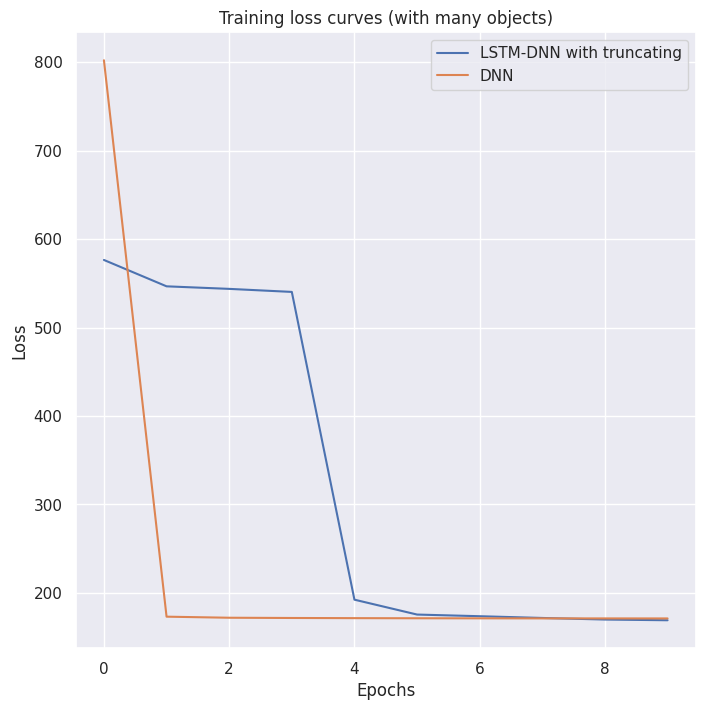

In [33]:
# Plot the loss curves
plt.figure(figsize = (8, 8))

# plt.plot(epoch_count, lstm_apppa_all_i, label = "LSTM-DNN with padding")
# plt.plot(epoch_count, lstm_apppa_motion_i, label = "LSTM-DNN with padding only motion samples")

plt.plot(epoch_count, lstm_apptr_all_i, label = "LSTM-DNN with truncating")
plt.plot(epoch_count, DNN_app_i, label = "DNN")

plt.title("Training loss curves (with many objects)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

## ---------------------------------------------------------------------------------------------------------

In [17]:
# Define the input shape
input_shape = (6489, 12)

# Define the number of output features
output_features = 14

# Create a custom DNN-LSTM model
class DNN_LSTMModel(nn.Module):
    def __init__(self, input_shape, output_features):
        super().__init__()
        self.relu = nn.ReLU()
        self.drop20 = nn.Dropout(0.2)
        self.drop50 = nn.Dropout(0.5)
        self.layer1 = nn.Linear(in_features = input_shape[1], out_features = 128)
        self.layer2 = nn.Linear(in_features = 128, out_features = 256)
        self.layer3 = nn.Linear(in_features = 256, out_features = 1024)
        self.layer4 = nn.Linear(in_features = 1024, out_features = 4096)
        self.layer5 = nn.Linear(in_features = 4096, out_features = 2048)
        self.layer6 = nn.Linear(in_features = 2048, out_features = 512)

        self.num_layers = 1

        self.lstm1 = nn.LSTM(512, 512, num_layers = self.num_layers, batch_first = True, dropout = 0.5)
        self.lstm2 = nn.LSTM(512, 256, num_layers = self.num_layers, bidirectional = True, batch_first = True, dropout = 0.2)
        self.lstm3 = nn.LSTM(512, 512, num_layers = self.num_layers, batch_first = True, dropout = 0.5)

        self.layer7 = nn.Linear(in_features = 512, out_features = 512)
        self.layer8 = nn.Linear(in_features = 512, out_features = 4096)
        self.layer9 = nn.Linear(in_features = 4096, out_features = 2048)
        self.layer10 = nn.Linear(in_features = 2048, out_features = 512)
        self.layer11 = nn.Linear(in_features = 512, out_features = 128)
        self.layer12 = nn.Linear(in_features = 128, out_features = output_features)

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.drop20(x)
        x = self.relu(self.layer3(x))
        x = self.relu(self.layer4(x))
        x = self.drop20(x)
        x = self.relu(self.layer5(x))
        x = self.drop50(x)
        x = self.relu(self.layer6(x))
        x = self.drop20(x)

        h0 = torch.zeros(self.num_layers, x.size(0), 512).to("cuda")
        c0 = torch.zeros(self.num_layers, x.size(0), 512).to("cuda")

        h1 = torch.zeros(self.num_layers * 2, x.size(0), 256).to("cuda")
        c1 = torch.zeros(self.num_layers * 2, x.size(0), 256).to("cuda")

        h2 = torch.zeros(self.num_layers, x.size(0), 512).to("cuda")
        c2 = torch.zeros(self.num_layers, x.size(0), 512).to("cuda")

        x, _ = self.lstm1(x, (h0, c0))
        x, _ = self.lstm2(x, (h1, c1))
        x, _ = self.lstm3(x, (h2, c2))

        x = self.relu(self.layer7(x))
        x = self.relu(self.layer8(x))
        x = self.drop50(x)
        x = self.relu(self.layer9(x))
        x = self.drop50(x)
        x = self.relu(self.layer10(x))
        x = self.relu(self.layer11(x))
        x = self.drop20(x)
        x = self.layer12(x)

        return (x)

In [ ]:
# Instantiate the model
model_4 = DNN_LSTMModel(input_shape, output_features).to('cuda')

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())

# Load your input and output data
x_train = np.load("X_train_truncating_i.npy")                    # 64**  motion samples
y_train = np.load("y_train_truncating_i.npy")

# Convert the data to PyTorch tensors
x_train = torch.tensor(x_train).float()
y_train = torch.tensor(y_train).float()

train_data = TensorDataset(x_train, y_train)

batch_size = 32
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
print(len(train_loader))

Dlstm_apptr_all = []
epoch_count = []

# Train the model for 10 epochs
for epoch in range(10):
    train_loss = 0
    for x_train, y_train in train_loader:

        x_train, y_train = x_train.to('cuda'), y_train.to('cuda')

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        y_pred = model_4(x_train)

        y_pred = y_pred.reshape(-1, 14).to('cuda')
        y_train = y_train.reshape(-1, 14).to('cuda')

        # Compute the loss
        loss = criterion(y_pred, y_train)
        train_loss += loss

        # Backward pass
        loss.backward()

        # Update the weights
        optimizer.step()
    train_loss /= len(train_loader)

    # Print the loss
    print(f'Epoch: {epoch+1}, Loss: {train_loss:.4f}')
    Dlstm_apptr_all.append(train_loss.cpu().detach().numpy())
    epoch_count.append(epoch)

In [22]:
# Define the input shape
input_shape = (6498, 12) # (sequence lenght, input size)

# Define the number of output features
output_features = 14

# Create a custom CNN model
class CNN_LSTM_Model(nn.Module):
    def __init__(self, input_shape, output_features):
        super(CNN_LSTM_Model, self).__init__()
        self.conv1 = nn.Conv1d(input_shape[1], 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(32, 128, kernel_size=3, padding=1)
        self.conv3 = nn.Conv1d(128, 512, kernel_size=3, padding=1)

        self.num_layers = 1

        self.lstm1 = nn.LSTM(512, 512, num_layers = self.num_layers, batch_first = True, dropout = 0.5)
        self.lstm2 = nn.LSTM(512, 256, num_layers = self.num_layers, bidirectional = True, batch_first = True, dropout = 0.2)
        self.lstm3 = nn.LSTM(512, 512, num_layers = self.num_layers, batch_first = True, dropout = 0.5)

        self.fc_h1 = nn.Linear(512,  512)
        self.fc_h2 = nn.Linear(512, 2048)
        self.fc_h3 = nn.Linear(2048, 4096)
        self.fc_h4 = nn.Linear(4096, 4096)
        self.fc_h5 = nn.Linear(4096, 4096)
        self.fc_h6 = nn.Linear(4096, 1024)
        self.fc_h7 = nn.Linear(1024, 256)
        self.fc = nn.Linear(256, output_features)
        self.relu = nn.ReLU()

    def forward(self, x):                                                       # (batch, seq_len, input_size)
        x = x.transpose(1, 2)                                                   # (batch, input_size, seq_len)
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)                                                       # (batch, seq_len, input_size)

        x = x.transpose(1, 2)

        h0 = torch.zeros(self.num_layers, x.size(0), 512).to("cuda")
        c0 = torch.zeros(self.num_layers, x.size(0), 512).to("cuda")

        h1 = torch.zeros(self.num_layers * 2, x.size(0), 256).to("cuda")
        c1 = torch.zeros(self.num_layers * 2, x.size(0), 256).to("cuda")

        h2 = torch.zeros(self.num_layers, x.size(0), 512).to("cuda")
        c2 = torch.zeros(self.num_layers, x.size(0), 512).to("cuda")

        x, _ = self.lstm1(x, (h0, c0))
        x, _ = self.lstm2(x, (h1, c1))
        x, _ = self.lstm3(x, (h2, c2))

        x = self.relu(self.fc_h1(x))
        x = self.relu(self.fc_h2(x))
        x = self.relu(self.fc_h3(x))
        x = self.relu(self.fc_h4(x))
        x = self.relu(self.fc_h5(x))
        x = self.relu(self.fc_h6(x))
        x = self.relu(self.fc_h7(x))
        x = self.fc(x)
        return x

model_5 = CNN_LSTM_Model(input_shape, output_features).to('cuda')

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())

# Load your input and output data
x_train = np.load("X_train_truncating_i.npy")
y_train = np.load("y_train_truncating_i.npy")

# Convert the data to PyTorch tensors
x_train = torch.tensor(x_train).float()
y_train = torch.tensor(y_train).float()

train_data = TensorDataset(x_train, y_train)

batch_size = 32
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
print(len(train_loader))

cnn_app = []
epoch_count = []

# Train the model for 10 epochs
for epoch in range(10):
    train_loss = 0
    for x_train, y_train in train_loader:

        x_train, y_train = x_train.to('cuda'), y_train.to('cuda')

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        y_pred = model_5(x_train)

        y_pred = y_pred.reshape(-1, 14).to('cuda')
        y_train = y_train.reshape(-1, 14).to('cuda')

        # Compute the loss
        loss = criterion(y_pred, y_train)
        train_loss += loss

        # Backward pass
        loss.backward()

        # Update the weights
        optimizer.step()
    train_loss /= len(train_loader)

    # Print the loss
    print(f'Epoch: {epoch+1}, Loss: {train_loss:.4f}')
    cnn_app.append(train_loss.cpu().detach().numpy())
    epoch_count.append(epoch)

120
Epoch: 1, Loss: 2443.4246
Epoch: 2, Loss: 2443.5315


KeyboardInterrupt: 

In [24]:
# Define the input shape
input_shape = (6498, 12) # (sequence lenght, input size)

# Define the number of output features
output_features = 14

# Create a custom CNN model
class CNNLSTM_Mo(nn.Module):
    def __init__(self, input_shape, output_features):
        super(CNNLSTM_Mo, self).__init__()
        self.conv1 = nn.Conv1d(input_shape[1], 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(32, 128, kernel_size=3, padding=1)
        self.conv3 = nn.Conv1d(128, 512, kernel_size=3, padding=1)

        self.num_layers = 1

        self.lstm1 = nn.LSTM(512, 512, num_layers = self.num_layers, batch_first = True, dropout = 0.5)
        self.lstm2 = nn.LSTM(512, 256, num_layers = self.num_layers, bidirectional = True, batch_first = True, dropout = 0.2)
        self.lstm3 = nn.LSTM(512, 512, num_layers = self.num_layers, batch_first = True, dropout = 0.5)

        self.conv4 = nn.Conv1d(512,  2048, kernel_size=3, padding=1)
        self.conv5 = nn.Conv1d(2048, 4096, kernel_size=3, padding=1)
        self.conv6 = nn.Conv1d(4096, 2048, kernel_size=3, padding=1)
        self.conv7 = nn.Conv1d(2048, 256, kernel_size=3, padding=1)
        self.conv8 = nn.Conv1d(256, output_features, kernel_size=1, padding=0)
        self.relu = nn.ReLU()

    def forward(self, x):                                                       # (batch, seq_len, input_size)
        x = x.transpose(1, 2)                                                   # (batch, input_size, seq_len)
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.relu(self.conv3(x))                                            # (batch, seq_len, input_size)

        x = x.transpose(1, 2)

        h0 = torch.zeros(self.num_layers, x.size(0), 512).to("cuda")
        c0 = torch.zeros(self.num_layers, x.size(0), 512).to("cuda")

        h1 = torch.zeros(self.num_layers * 2, x.size(0), 256).to("cuda")
        c1 = torch.zeros(self.num_layers * 2, x.size(0), 256).to("cuda")

        h2 = torch.zeros(self.num_layers, x.size(0), 512).to("cuda")
        c2 = torch.zeros(self.num_layers, x.size(0), 512).to("cuda")

        x, _ = self.lstm1(x, (h0, c0))
        x, _ = self.lstm2(x, (h1, c1))
        x, _ = self.lstm3(x, (h2, c2))

        x = x.transpose(1, 2)

        x = self.relu(self.conv4(x))
        x = self.relu(self.conv5(x))
        x = self.relu(self.conv6(x))
        x = self.relu(self.conv7(x))
        x = self.conv8(x)
        return x

model_5 = CNN_LSTM_Model(input_shape, output_features).to('cuda')

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())

# Load your input and output data
x_train = np.load("X_train_truncating_i.npy")
y_train = np.load("y_train_truncating_i.npy")

# Convert the data to PyTorch tensors
x_train = torch.tensor(x_train).float()
y_train = torch.tensor(y_train).float()

train_data = TensorDataset(x_train, y_train)

batch_size = 32
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
print(len(train_loader))

cnn_app = []
epoch_count = []

# Train the model for 10 epochs
for epoch in range(10):
    train_loss = 0
    for x_train, y_train in train_loader:

        x_train, y_train = x_train.to('cuda'), y_train.to('cuda')

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        y_pred = model_5(x_train)

        y_pred = y_pred.reshape(-1, 14).to('cuda')
        y_train = y_train.reshape(-1, 14).to('cuda')

        # Compute the loss
        loss = criterion(y_pred, y_train)
        train_loss += loss

        # Backward pass
        loss.backward()

        # Update the weights
        optimizer.step()
    train_loss /= len(train_loader)

    # Print the loss
    print(f'Epoch: {epoch+1}, Loss: {train_loss:.4f}')
    cnn_app.append(train_loss.cpu().detach().numpy())
    epoch_count.append(epoch)

120
Epoch: 1, Loss: 2443.5564
Epoch: 2, Loss: 2443.5520


KeyboardInterrupt: 

In [23]:
filepath = "/LSTM_first.pth"
# filepath_4 = "/LSTM_mid"
# filepath_5 = "/CNN_LSTM_based"

torch.save(model, filepath)
# torch.save(model_4, filepath)
# torch.save(model_5, filepath)

# torch.load(filepath)

## We can try some manifold methods to represent the input data

In [57]:
# Prepare the data for training

# Merge Excersice 1 and 2
X_train = pd.concat([emg1, emg2])

print(X_train.shape)

X_test1 = X_train.iloc[:200000,:]
X_test2 = X_train.iloc[-200000:,:]
X_test = pd.concat([X_test1, X_test2])

X_train = X_train.iloc[200000:,:].iloc[:-200000,:]

print(X_train.shape)
print(X_test.shape)

# Convert the Dataframe to Tensor
train = torch.tensor(X_train.values.astype(np.float32))
test = torch.tensor(X_test.values.astype(np.float32))

# the input is the same as the output
train_data = TensorDataset(train, train)
test_data = TensorDataset(test, test)

batch_size = 400000
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

(4361620, 12)
(3961620, 12)
(400000, 12)


In [58]:
class my_model(nn.Module):
    def __init__(self):
        super().__init__()
        self.relu = nn.ReLU()
        self.layer1 = nn.Linear(in_features = 12, out_features = 256)
        self.layer2 = nn.Linear(in_features = 256, out_features = 128)
        self.layer3 = nn.Linear(in_features = 128, out_features = 64)
        self.layer4 = nn.Linear(in_features = 64, out_features = 2)

        self.layer5 = nn.Linear(in_features = 2, out_features = 64)
        self.layer6 = nn.Linear(in_features = 64, out_features = 128)
        self.layer7 = nn.Linear(in_features = 128, out_features = 256)
        self.layer8 = nn.Linear(in_features = 256, out_features = 12)

        self.encoder = nn.Sequential(
            self.layer1,
            self.relu,
            self.layer2,
            self.relu,
            self.layer3,
            self.relu,
            self.layer4,
        )
        self.decoder = nn.Sequential(
            self.relu,
            self.layer5,
            self.relu,
            self.layer6,
            self.relu,
            self.layer7,
            self.relu,
            self.layer8,
            self.relu,
        )

    def forward(self, inp):
        x = self.encoder(inp)
        x = self.decoder(x)
        return (x)

device0 = 'cuda'

# Build and define your model
model = my_model()
model.to(device0)

# Define the Loss function and the Optimizer
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(params = model.parameters())

# Specify the number of epochs
epochs = 10

# Instantiate lists to save the loss values during the training process
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):

    train_loss = 0
    for train_x, train_y in train_loader:

        train_x, train_y = train_x.to(device0), train_y.to(device0)
        # Training mode
        model.train()

        # Feedforsward
        y_pred = model(train_x)

        # At start of each Epoch
        optimizer.zero_grad()

        # Calculate the loss function
        loss = loss_fn(y_pred, train_y)
        train_loss += loss

        # Do the back probagation and update the parameters
        loss.backward()
        optimizer.step()

    train_loss /= len(train_loader)

    # Evaluation mode
    model.eval()

    loss_test = 0
    with torch.inference_mode():
        for test_x, test_y in test_loader:
            test_x, test_y = test_x.to(device0), test_y.to(device0)

            # Feedforward again for the evaluation phase
            y_pred_test = model(test_x)

            # Calculate the loss for the test dataset
            loss_test += loss_fn(y_pred_test, test_y)

        loss_test /= len(test_loader)

    # Append loss values for the training process
    train_loss_values.append(loss.cpu().detach().numpy())
    test_loss_values.append(loss_test.cpu().detach().numpy())
    epoch_count.append(epoch)
    print(f"Epoch : {epoch + 1} | train_Loss: {loss} | test_Loss: {loss_test}")

Epoch : 1 | train_Loss: 7.136820556752355e-08 | test_Loss: 1.2754732825470683e-09
Epoch : 2 | train_Loss: 1.4395392655686123e-09 | test_Loss: 1.2754731715247658e-09
Epoch : 3 | train_Loss: 1.426638474022468e-09 | test_Loss: 1.2754732825470683e-09
Epoch : 4 | train_Loss: 1.4343163323715657e-09 | test_Loss: 1.2754732825470683e-09
Epoch : 5 | train_Loss: 1.4183222374342108e-09 | test_Loss: 1.2754732825470683e-09
Epoch : 6 | train_Loss: 1.4423984229239295e-09 | test_Loss: 1.2754732825470683e-09
Epoch : 7 | train_Loss: 1.4282323101966199e-09 | test_Loss: 1.2754731715247658e-09
Epoch : 8 | train_Loss: 1.4252220514876512e-09 | test_Loss: 1.2754731715247658e-09
Epoch : 9 | train_Loss: 1.4069896359103495e-09 | test_Loss: 1.2754731715247658e-09
Epoch : 10 | train_Loss: 1.4222306665701012e-09 | test_Loss: 1.2754731715247658e-09


In [68]:
e = torch.tensor(emg1.values.astype(np.float32))
coding = model.encoder(e.to('cuda'))
coding.shape

torch.Size([1808331, 2])

In [75]:
cod = coding.cpu().detach().numpy()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


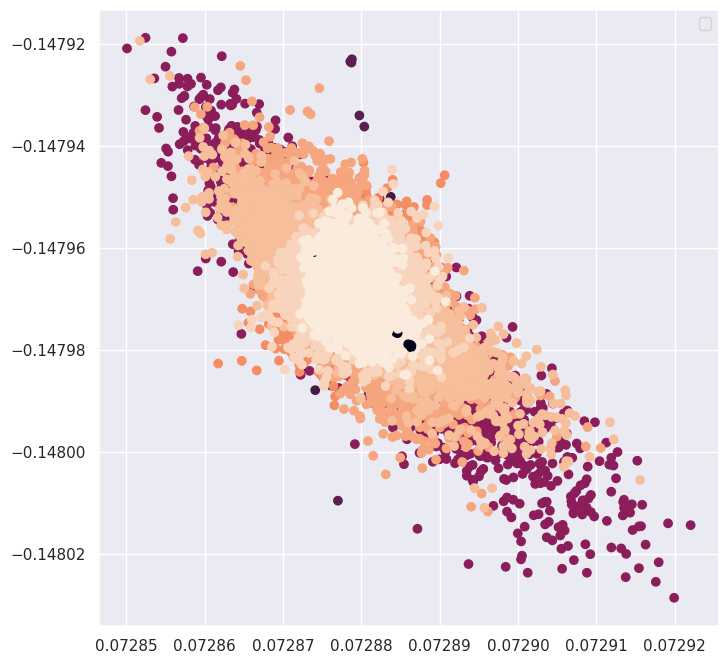

In [84]:
# Plot the loss curves
plt.figure(figsize = (8, 8))
plt.scatter(cod.T[0], cod.T[1], c= np.array(stimulus1).reshape(-1,))
plt.legend()
plt.show()

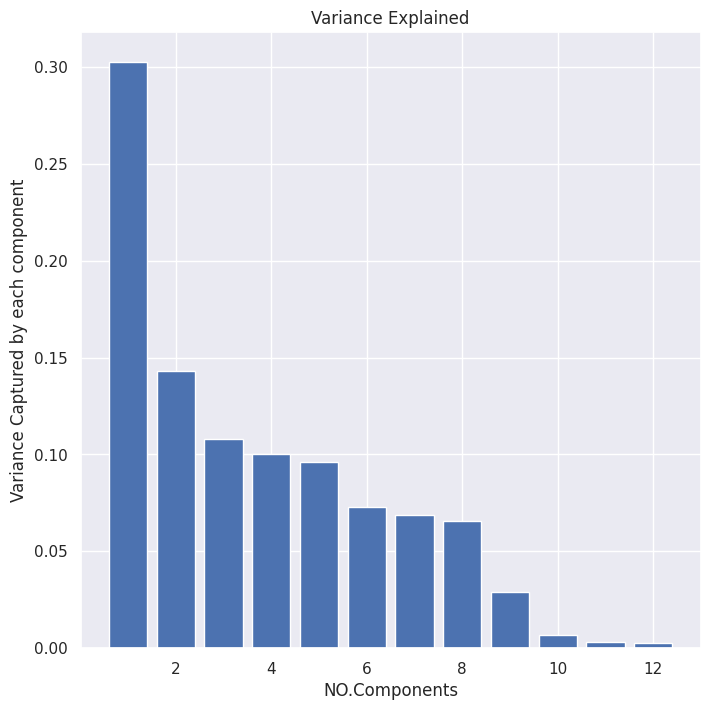

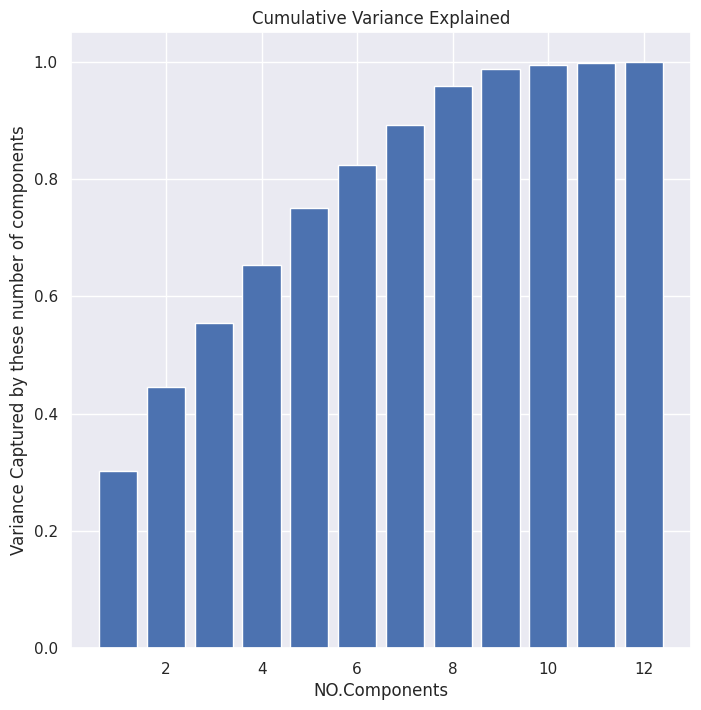

9
7


In [89]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(emg1)
plt.figure(figsize = (8, 8))
plt.bar(range(1, len(pca.explained_variance_ratio_) +  1), pca.explained_variance_ratio_)
plt.xlabel("NO.Components")
plt.ylabel("Variance Captured by each component")
plt.title("Variance Explained")
plt.show()

var_cum = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize = (8, 8))
plt.bar(range(1, len(var_cum) + 1), var_cum)
plt.xlabel("NO.Components")
plt.ylabel("Variance Captured by these number of components")
plt.title("Cumulative Variance Explained")
plt.show()

print(sum(var_cum < 0.99))  # 9 component
print(sum(var_cum < 0.95))  # 7 component